# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import graphviz
import mglearn as mglearn
import matplotlib.pyplot as plt
# ensures plots are inlined for the notebook presentation
%matplotlib inline 
import scipy as sp
from scipy import stats
import time
from IPython.display import display
import seaborn as sns
import os
import tensorflow as tf

In [2]:
# Sci-Kit Imports
import sklearn as sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.datasets import make_blobs
# from sklearn.datasets import load_breast_cancer
# from sklearn.datasets import make_moons
# from sklearn.datasets import make_circles
from sklearn.datasets import load_wine

# Warnings

In [3]:
# Mute warnings
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# warnings.simplefilter(action='ignore', category=WARNING)

# sklearn Wine Data Set - Decision Tree Classifier

# Load Wine and Explore

In [4]:
# load Wine dataset
wine = load_wine(return_X_y=False)

# Metadata Descriptive
print("Keys of dataset:\n", wine.keys())
print("Feature names:\n", wine['feature_names'])
print("Shape of data:", wine['data'].shape)
print("Type of target:", type(wine['target']))
print("Target:\n", wine['target'])
print("Shape of target:", wine['target'].shape)

Keys of dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
Feature names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape of data: (178, 13)
Type of target: <class 'numpy.ndarray'>
Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Shape of target: (178,)


In [5]:
# Create Pandas DataFrame
wine_target = pd.DataFrame(wine.target_names, columns=['class'])
wine_features = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_pd = pd.concat([wine_target, wine_features], axis=1)
wine_pd.head()
# wine_pd.nlargest(25, 'alcohol')

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,class_0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,class_1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,class_2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,NaN,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,NaN,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# Summary Statistics
wine_pd.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
# Look for nulls
wine_pd.isna().sum()

class                           175
alcohol                           0
malic_acid                        0
ash                               0
alcalinity_of_ash                 0
magnesium                         0
total_phenols                     0
flavanoids                        0
nonflavanoid_phenols              0
proanthocyanins                   0
color_intensity                   0
hue                               0
od280/od315_of_diluted_wines      0
proline                           0
dtype: int64

<Figure size 1440x720 with 0 Axes>

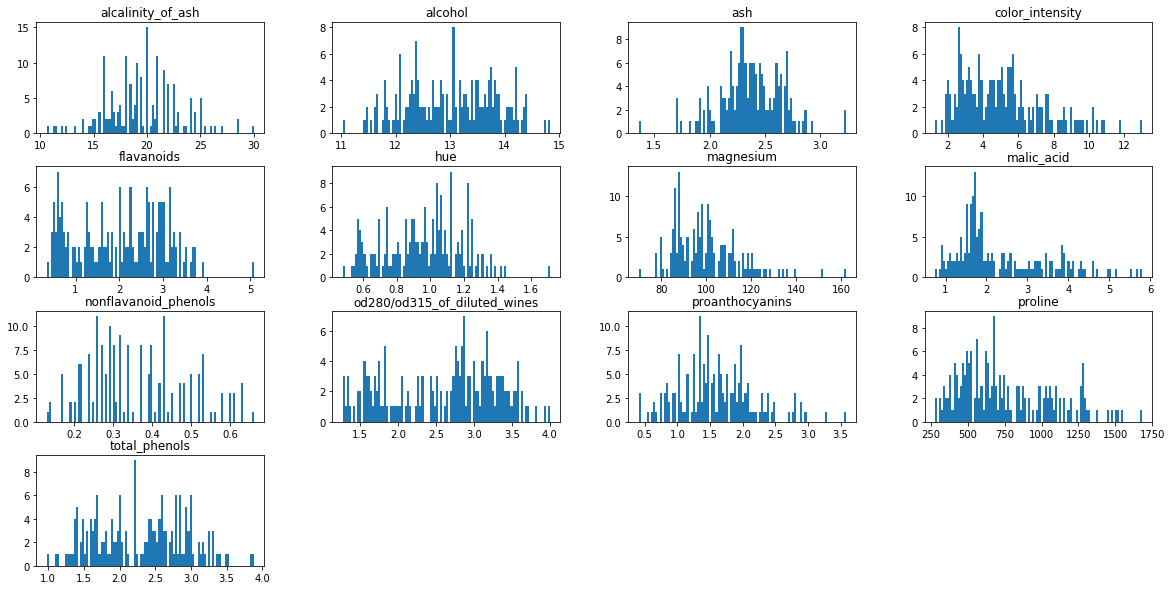

In [8]:
# create histograms
plt.figure(figsize=(20,10))
wine_pd.hist(figsize=(20,10), bins=100, grid=False)
plt.show()

# Decision Tree Classifier Model - ROC/AUC

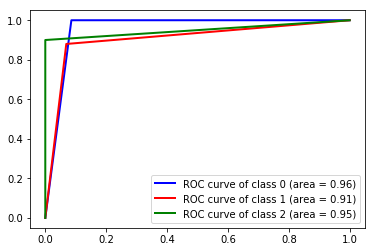

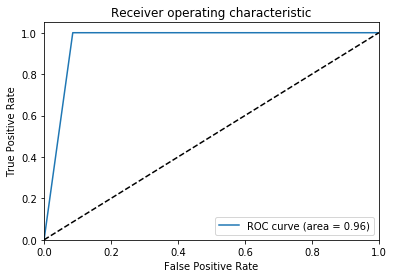

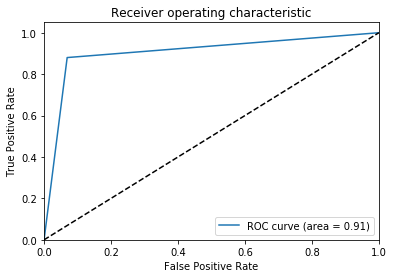

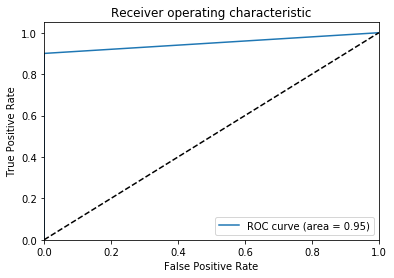

In [9]:
# Import plotting, roc, binarize and decision tree tools
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize

# reload for classification
wine = datasets.load_wine()
wine_features = wine.data
wine_target = wine.target

# Binarize target
wine_target_binarize = label_binarize(wine_target, classes=[0,1,2])
n_classes = 3

# train test spilt
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target_binarize, 
                                                    test_size=0.30, random_state=321)

# Classification
dt_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=321))
wine_target_score = dt_clf.fit(X_train, y_train).predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], wine_target_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.0,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.legend(loc="lower right")
         
# Plot of a ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Random Forest Classifier Model - ROC/AUC

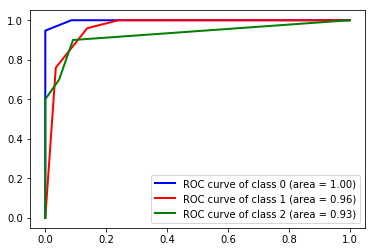

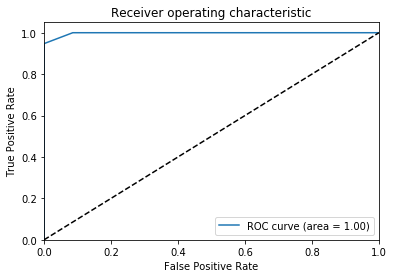

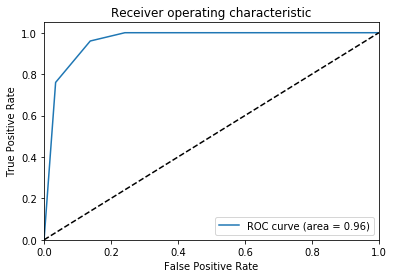

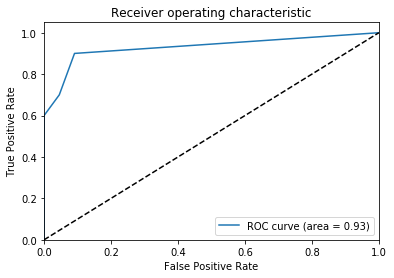

In [10]:
# imports done in decision tree classifier above
# reload for classification done in decision tree classifier above
# Binarize target decision tree classifier above
# train test spilt decision tree classifier above

from sklearn.ensemble import RandomForestClassifier

# Classification for Random Forest
dt_clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=3, random_state=321))
wine_target_score = dt_clf.fit(X_train, y_train).predict_proba(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], wine_target_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2.0,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    plt.legend(loc="lower right")
         
# Plot of a ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Additional Decision Tree Classifier Model Assessment

In [11]:
# Treat data for scalability with "pipelined scaling" as seen in histograms showing heterogeneous 
# scale due to differing properties of each component
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

wine_target_binarize = label_binarize(wine_target, classes=[0,1,2])
n_classes = 3

wine_features, wine_target_binarize = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(wine_features, wine_target_binarize, 
                                                    test_size=0.30, random_state=321)

# Fit to data and predict using pipelined scaling, PCA, and DecisionTreeClassifier
dt_clf = make_pipeline(StandardScaler(), PCA(n_components=2), DecisionTreeClassifier(random_state=321))
dt_clf.fit(X_train, y_train)
pred_test_dt = dt_clf.predict(X_test)

print('\nPrediction accuracy for the scaled test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_dt)))


Prediction accuracy for the scaled test dataset with PCA
92.59%



In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pred_test_dt))

[[17  2  0]
 [ 0 23  2]
 [ 0  0 10]]


In [13]:
print(classification_report(y_test, pred_test_dt))
# Decision Tree Classifier with standardization via scalaing gives the precision accuracy of 93%

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.92      0.92      0.92        25
           2       0.83      1.00      0.91        10

   micro avg       0.93      0.93      0.93        54
   macro avg       0.92      0.94      0.92        54
weighted avg       0.93      0.93      0.93        54



# Back-propagation Neural Network - Tensorflow

In [14]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_california_housing

ca_housing = fetch_california_housing(
    data_home=None, download_if_missing=True, return_X_y=False)


X_train, X_test, y_train, y_test = train_test_split(ca_housing.data, ca_housing.target, 
                                                    test_size=0.30, random_state=321)


ca_housing.train = (X_train, y_train)
ca_housing.test = (X_test, y_test)

learning_rate = 0.1
# epochs = 10
num_steps = 500
batch_size = 128
display_step = 100


# Network parameters
n_hidden_1 = 10 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer of neurons
num_input = 20640 # ca_housing data input
num_classes = 2 # ca_housing total classes (2 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
        'h1':
            tf.Variable(tf.random_normal([num_input, n_hidden_1])),
        'h2':
            tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
        'out':
            tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
            'b1':
                tf.Variable(tf.random_normal([n_hidden_1])),
            'b2':
                tf.Variable(tf.random_normal([n_hidden_2])),
            'out':
                tf.Variable(tf.random_normal([num_classes]))
}


Instructions for updating:
Colocations handled automatically by placer.


In [15]:
# Create model
def neural_net(x):
# Hidden fully connected layer with 10 neurons
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
# Hidden fully connected layer with 10 neurons
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
# Output fully connected layer with a neuron for each class
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
        return out_layer
    
# Construct model
logits = neural_net(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

#Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
#Start training with ca_housing
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = ca_housing.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step == 0 or step == 1:
            #Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y:batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
              "{:.4f}".format(loss) + ", Training Accuracy= " + \
              "{:.3f}".format(acc))
    print("Optimization Finished")   
    
    # Calculate accuracy for ca_housing
    print("Testing Accuracy: ", accuracy.eval(
        {X: ca_housing.test.data, Y: ca_housing.test.target}))

AttributeError: 'tuple' object has no attribute 'next_batch'